In [10]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as to_cat 

import numpy as np ; import matplotlib.pyplot as plt 
import pandas as pd 
import cv2,os,random
from PIL import Image

In [11]:
data = pd.read_csv("./age_gender.csv")[["age","gender","pixels"]]
data['age_bins'] = pd.cut(
    x=data['age'],
    bins=[0, 12, 19, 60, 117],
    labels=['child', 'teenager', 'adult', 'senior_citizen'],
    include_lowest=True
)

In [12]:
data["pixels"] =  data["pixels"].apply(lambda x : np.array(x.split(),dtype="float32") )
data["pixels"]  = data["pixels"].apply(lambda x : x /255)
x = np.array(data['pixels'].tolist())
x = x.reshape(x.shape[0],48,48,1)  ## COMMON TO BOTH 

## MODEL FOR AGE COLUMN

In [13]:
data.age_bins.unique()

['child', 'senior_citizen', 'teenager', 'adult']
Categories (4, object): ['child' < 'teenager' < 'adult' < 'senior_citizen']

In [14]:
y=  data["age_bins"].map({"child":0,"teenager":1,"adult":2,"senior_citizen":3})


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [16]:
y_train = to_cat(y_train)
y_test = to_cat(y_test)

## **TRAINING ON AGE SET**

In [17]:
model = Sequential([
    Conv2D(64,(3,3),input_shape=(48,48,1),activation="relu"),
    MaxPool2D(2,2),
    Conv2D(32,(3,3),activation="relu"),
    MaxPool2D(2,2),
    Flatten(),
    Dense(32,activation="relu"),
    Dense(4,activation="softmax")
])

In [20]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])
history =  model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3)

Epoch 1/3
593/593 [==============================] - 47s 76ms/step - loss: 0.3467 - acc: 0.8739 - val_loss: 0.3520 - val_acc: 0.8753
Epoch 2/3
593/593 [==============================] - 46s 77ms/step - loss: 0.3312 - acc: 0.8807 - val_loss: 0.3541 - val_acc: 0.8711
Epoch 3/3
593/593 [==============================] - 46s 78ms/step - loss: 0.3111 - acc: 0.8863 - val_loss: 0.3535 - val_acc: 0.8703


In [126]:
loss,acc = model.evaluate(x_test,y_test)
acc

149/149 [==============================] - 2s 15ms/step - loss: 0.3902 - acc: 0.8682


0.8681712746620178

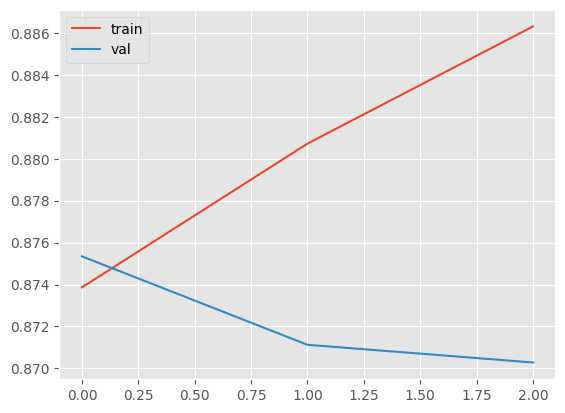

In [21]:
## Accuracy
plt.style.use("ggplot")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(["train","val"],loc='upper left')


In [128]:
# model.save("age_model.h5")
# model.save("age_model.hdf5")

## Model for Gender 

In [89]:
y =  data["gender"].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [12]:
y_train = to_cat(y_train)
y_test = to_cat(y_test)

In [8]:
model_gen = Sequential([
    Conv2D(64,(3,3),input_shape=(48,48,1),activation="relu"),
    MaxPool2D(2,2),
    # Conv2D(32,(3,3),activation="relu"),
    # MaxPool2D(2,2),
    Flatten(),
    # Dense(32,activation="relu"),
    Dense(2,activation="softmax")
])

In [9]:
model_gen.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])
history =  model_gen.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

NameError: name 'x_train' is not defined

In [16]:
loss,acc = model_gen.evaluate(x_test,y_test)
acc

149/149 [==============================] - 2s 14ms/step - loss: 0.2801 - acc: 0.8861


0.8860999941825867

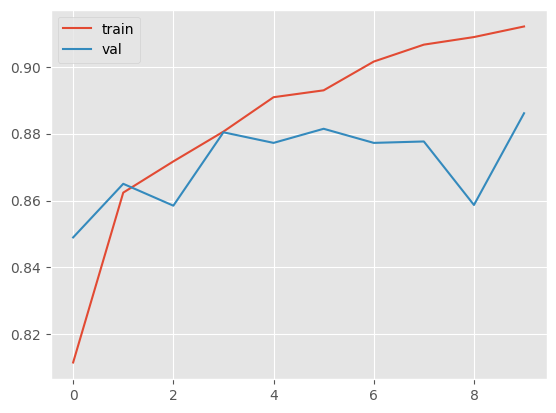

In [17]:
## Accuracy
plt.style.use("ggplot")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(["train","val"],loc='upper left')

In [20]:
# model_gen.save("gender_model.h5")
# model_gen.save("gender_model.hdf5")

In [68]:
from keras.models import load_model

In [85]:
model_age  =  load_model("./models/gender_model.h5")

In [93]:
img =  np.expand_dims(x_test[5],axis=0)
pred = model_age.predict(img)
pred =  np.argmax(pred,axis=1)
pred

1/1 [==============================] - 0s 42ms/step


array([1], dtype=int64)

In [90]:
y_test[:10]

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)